# Business Problem 

In [ ]:
''' 
Perform hierarchical and K-means clustering on the dataset. After that, 
perform PCA on the dataset and extract the first 3 principal components and make
a new dataset with these 3 principal components as the columns.
Now, on this new dataset, perform hierarchical and K-means clustering.
Compare the results of clustering on the original dataset and clustering on the principal components 
dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check 
if you’re getting similar results with and without PCA).
'''

# Business Objective

In [ ]:
'''
The primary objective of this analysis is to identify distinct patient groups within the dataset based on their 
characteristics and medical history. These patient groups can be used to tailor treatment plans, target specific
marketing campaigns, and improve clinical decision-making.
'''

# Business Constraints 

In [ ]:
''' 
Data Quality: Ensure the data is accurate, complete, and consistent. Missing or erroneous data can significantly impact the analysis results.
Data Privacy: Adhere to data privacy regulations (e.g., GDPR, HIPAA) to protect patient information.
Time Constraints: Determine the timeline for completing the analysis and delivering insights.
'''

In [9]:
# Load the necessary libraries 
import pandas as pd
df = pd.read_csv("C:/PCA/homeprices.csv")
df.head()

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000


In [31]:
# Data Preproccesing
X = df.drop(columns=['price'])  # Features (independent variables)
y = df['price'] 
# convert the town column into numericle form
X = pd.get_dummies(X, columns=['town'], drop_first=True)

# checking the missing values
df.isnull().sum()



town     0
area     0
price    0
dtype: int64

In [33]:
#drop rows with missing values
df.dropna(inplace=True)

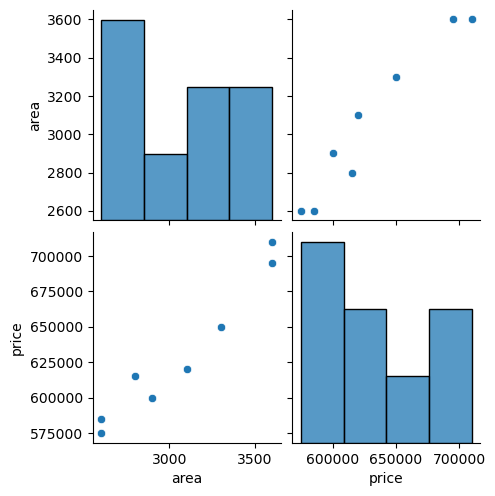

In [35]:
# Exploratory Data Analysis
import seaborn as sns
import matplotlib.pyplot as plt
df.describe()

# pairplot for visulization
sns.pairplot(df)
plt.show()

In [39]:
# Standerize the data
from sklearn.preprocessing import StandardScaler
sd1 = StandardScaler()
sd = sd1.fit_transform(X)

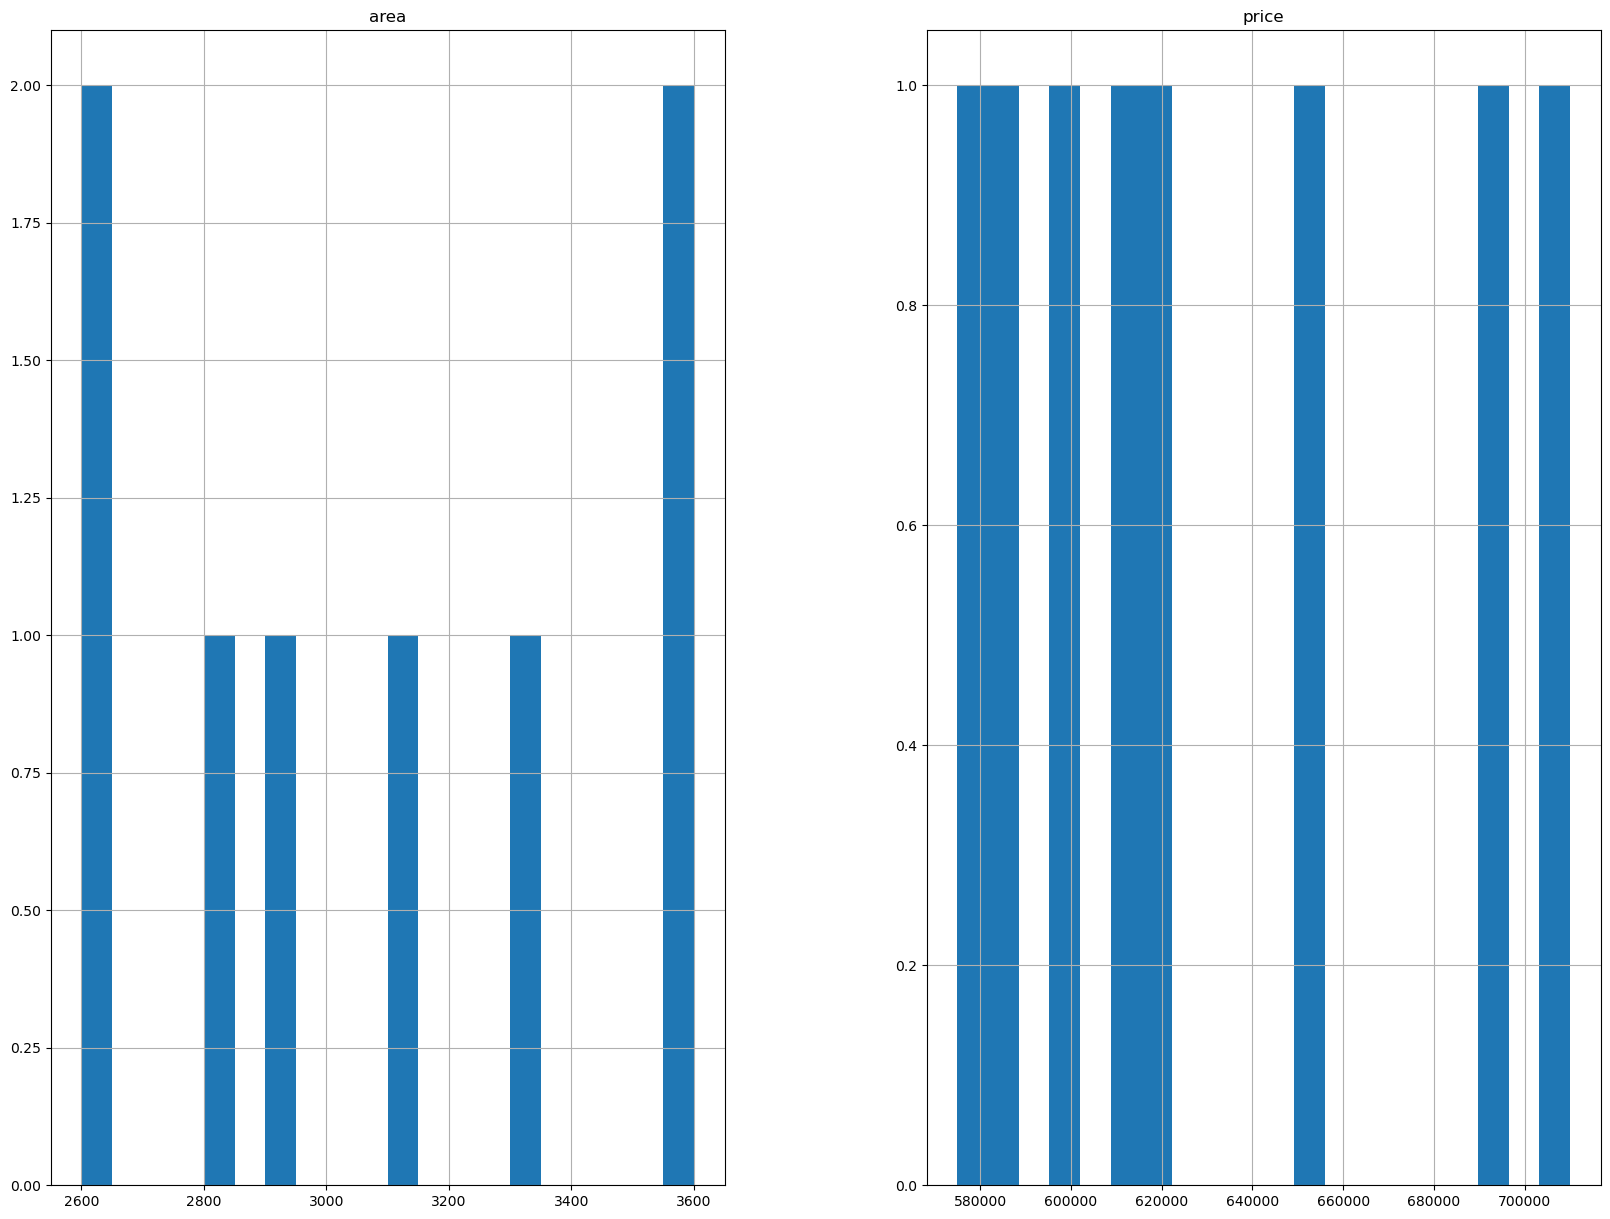

In [42]:
# Univariate Analysis means plotting histogram for each features.
df.hist(bins=20, figsize=(20, 15))
plt.show()

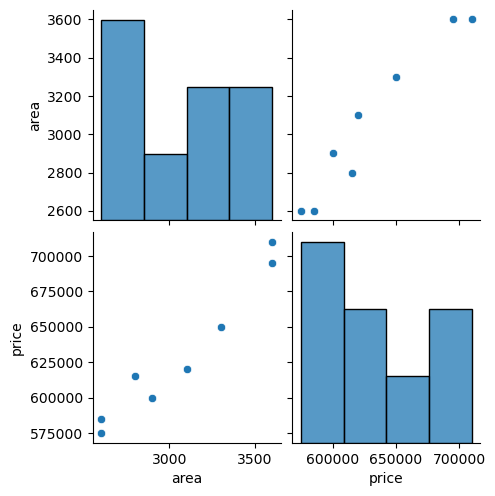

In [46]:
# Bivariate Analysis
sns.pairplot(df)
plt.show()

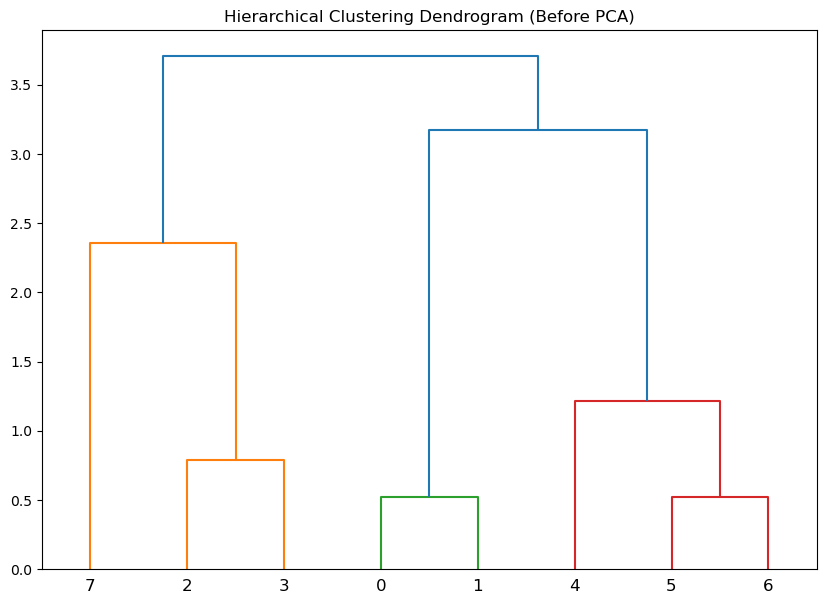

In [50]:
# 3.1 Hierarchical Clustering on original data
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(sd, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Hierarchical Clustering Dendrogram (Before PCA)')
plt.show()


C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


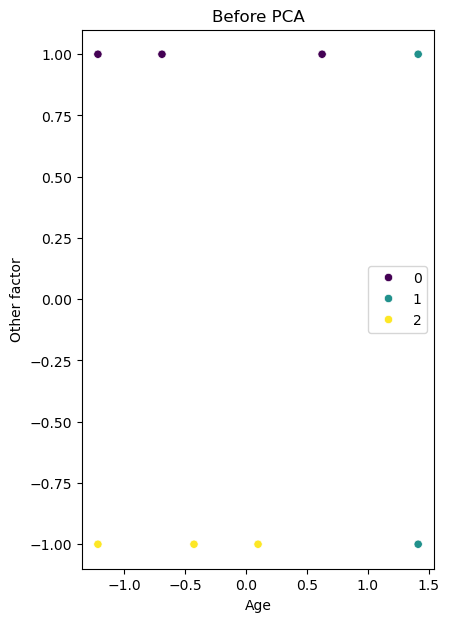

In [60]:
# Import libraries 
from sklearn.cluster import KMeans

# Apply k-means clustering
km = KMeans(n_clusters=3)
km = km.fit_predict(sd)

# Visulize the original data 
plt.figure(figsize=(10,7))
# plot original data clustering
plt.subplot(1,2,1)
sns.scatterplot(x=sd[:, 0], y=sd[:, 1], hue=km, palette='viridis')
plt.title("Before PCA")
plt.xlabel('Age')
plt.ylabel('Other factor')
plt.show()

C:\Users\anuradha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


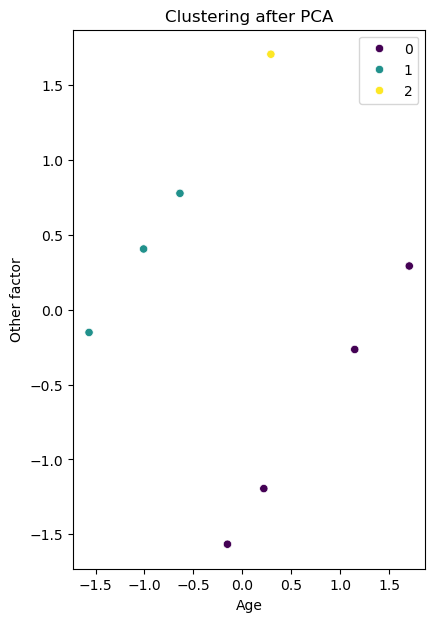

In [62]:
# After applying PCA 
# import the libraries
from sklearn.decomposition import PCA

#Apply PCA
pca = PCA(n_components=2)
pca1 = pca.fit_transform(sd)

# A pply kmeans clustering on PCA reduces data
kmp1 = KMeans(n_clusters=3)
kmp = kmp1.fit_predict(pca1)

# Visulize the cluster after PCA 
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
sns.scatterplot(x=pca1[: , 0],y=pca1[:, 1], hue=kmp, palette='viridis')
plt.title("Clustering after PCA")
plt.xlabel('Age')
plt.ylabel("Other factor")
plt.show()


In [64]:
# Compare the two clustering results
comparison = pd.DataFrame({
    'Original Cluster': km,
    'PCA Cluster': kmp
})

# Display the comparison
print(comparison.value_counts())

Original Cluster  PCA Cluster
0                 0              3
2                 1              3
1                 0              1
                  2              1
Name: count, dtype: int64


In [66]:
#PCA Variance Explained: Check how much variance is explained by the principal components:
print(pca.explained_variance_ratio_)

[0.51642215 0.48357785]
